# Surface curvature measurements using vedo in napari
The [vedo library](https://vedo.embl.es/) offers a set of measurements to describe the curvature of surfaces. This notebook shows how to use them on surface data in napari.

See also
* [vedo add curvature documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html?highlight=curvature#vedo.mesh.Mesh.addCurvatureScalars)

In [1]:
import napari_process_points_and_surfaces as nppas

import napari
import matplotlib.pyplot as plt
from napari.utils import nbscreenshot
import numpy as np
import vedo

In [2]:
viewer = napari.Viewer(ndisplay=3)
viewer.camera.angles = (-45, 0, -90)

We will be working with a simple geometry (i.e., an ellipsoid) to demonstrate the curvature property and the different settings.

In [3]:
surface = nppas.gastruloid()
viewer.add_surface(surface)

The nppas gastruloid example is derived from AV Luque and JV Veenvliet (2023) which is licensed CC-BY (https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081


<Surface layer 'surface' at 0x1fcdd569a60>

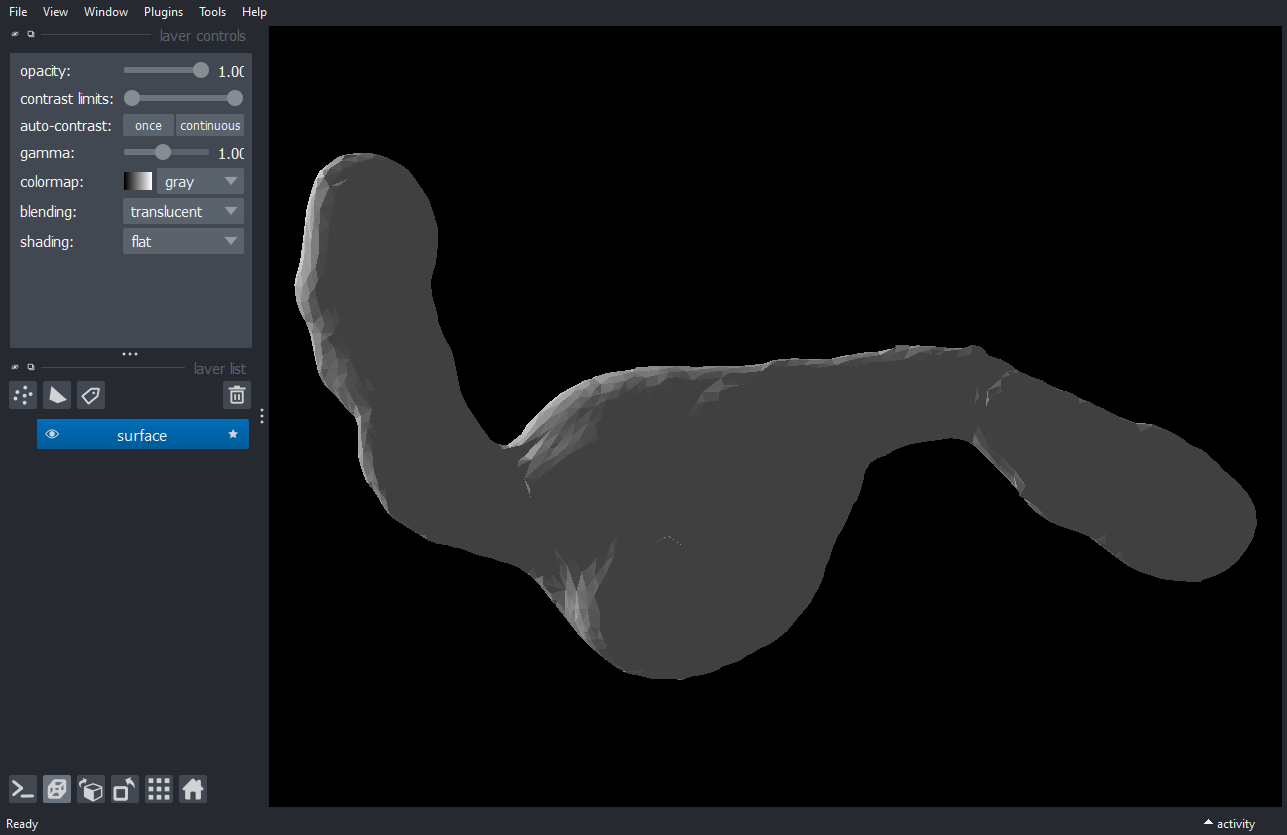

In [4]:
napari.utils.nbscreenshot(viewer)

We use `add_curvature()` to calculate the local curvature. Note that this method is highly dependent on the *local vertex structure*. In other words, it is sensitive to the local curvature, not necessarily the overall shape of an object. Available methods to determine curvature are `Curvature.Gauss_Curvature`, `Curvature.Mean_Curvature`, `Curvature.Maximum_Curvature` and `Curvature.Minimum_Curvature`.

c:\structure\code\napari-process-points-and-surfaces\napari_process_points_and_surfaces\__init__.py:74: UserWarning: nppas.add_curvature is deprecated. Use add_curvature_scalars instead!
  warnings.warn("nppas.add_curvature is deprecated. Use add_curvature_scalars instead!")


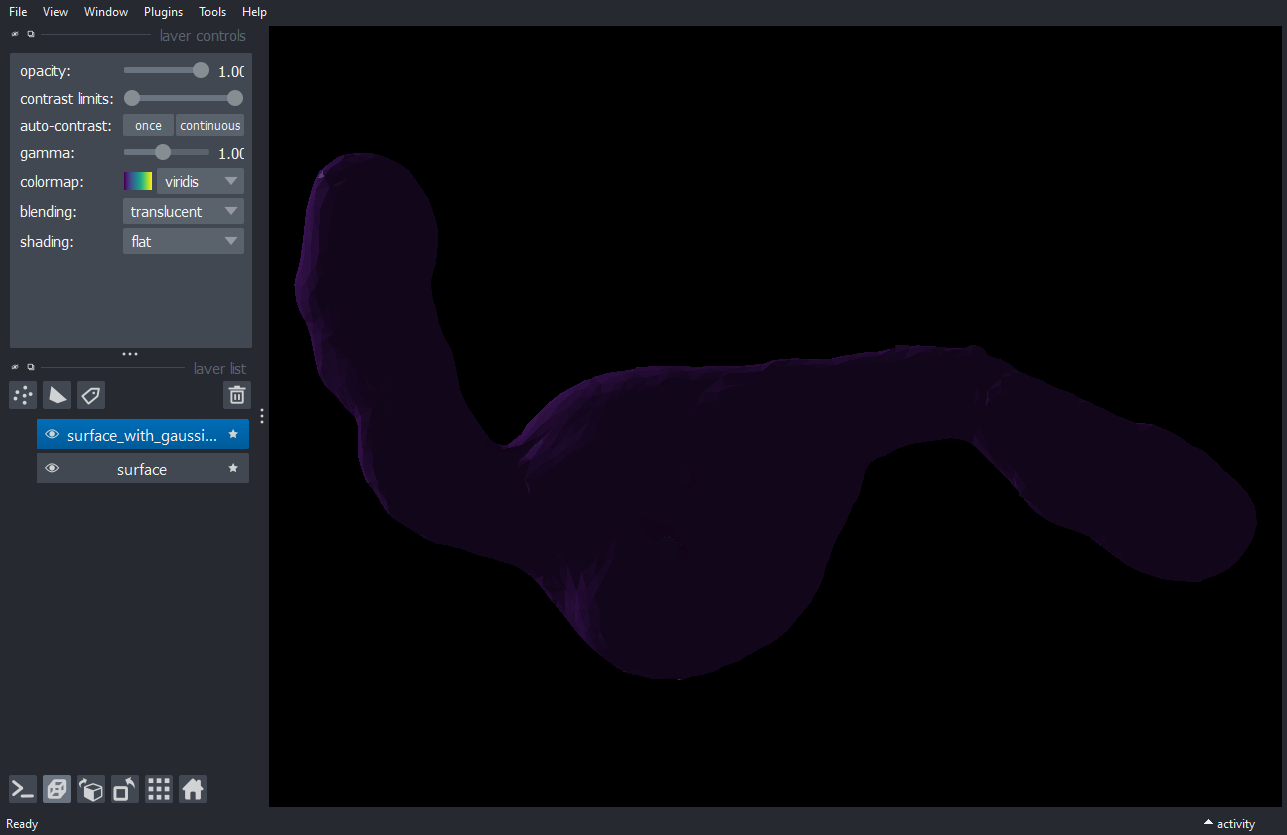

In [5]:
surface_with_gaussian_curvature = nppas.add_curvature(surface, curvature_id=nppas.Curvature.Gauss_Curvature)
viewer.add_surface(surface_with_gaussian_curvature, colormap='viridis')

napari.utils.nbscreenshot(viewer)

We can use the sphere-fitted curvature algorithm to determine the curvature and specifiy the range within which points should be taken into account for the calculation. For this, a sphere is fitted to all points in the neighborhood of a given point. Since the curvature of a sphere is defined as $\frac{1}{r^2}$ ([see here](https://en.wikipedia.org/wiki/Gaussian_curvature)), this can be used as an approximation for the local curvature. The radius is passed as order of magnitude: E.g. one can enter `SPHERE_FITTED_CURVATURE_VOXEL` to search in a radius of 1, or `SPHERE_FITTED_CURVATURE_DECI_VOXEL` in a radius of 10 or `SPHERE_FITTED_CURVATURE_HECTA_VOXEL` in a radius of 100. Obviously, the right order of magnitude depends on the size of the object. You can read the size of the object in this view by looking at the average size and the bounds:

(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64))
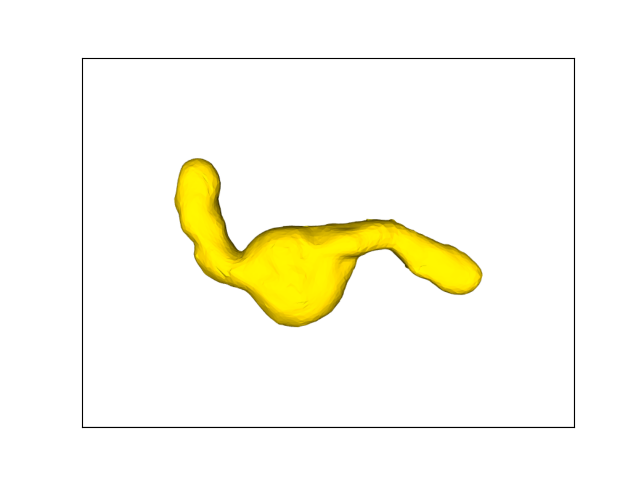

In [6]:
surface

c:\structure\code\vedo\vedo\pointcloud.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C, residue, rank, _ = np.linalg.lstsq(A, f)  # solve AC=f


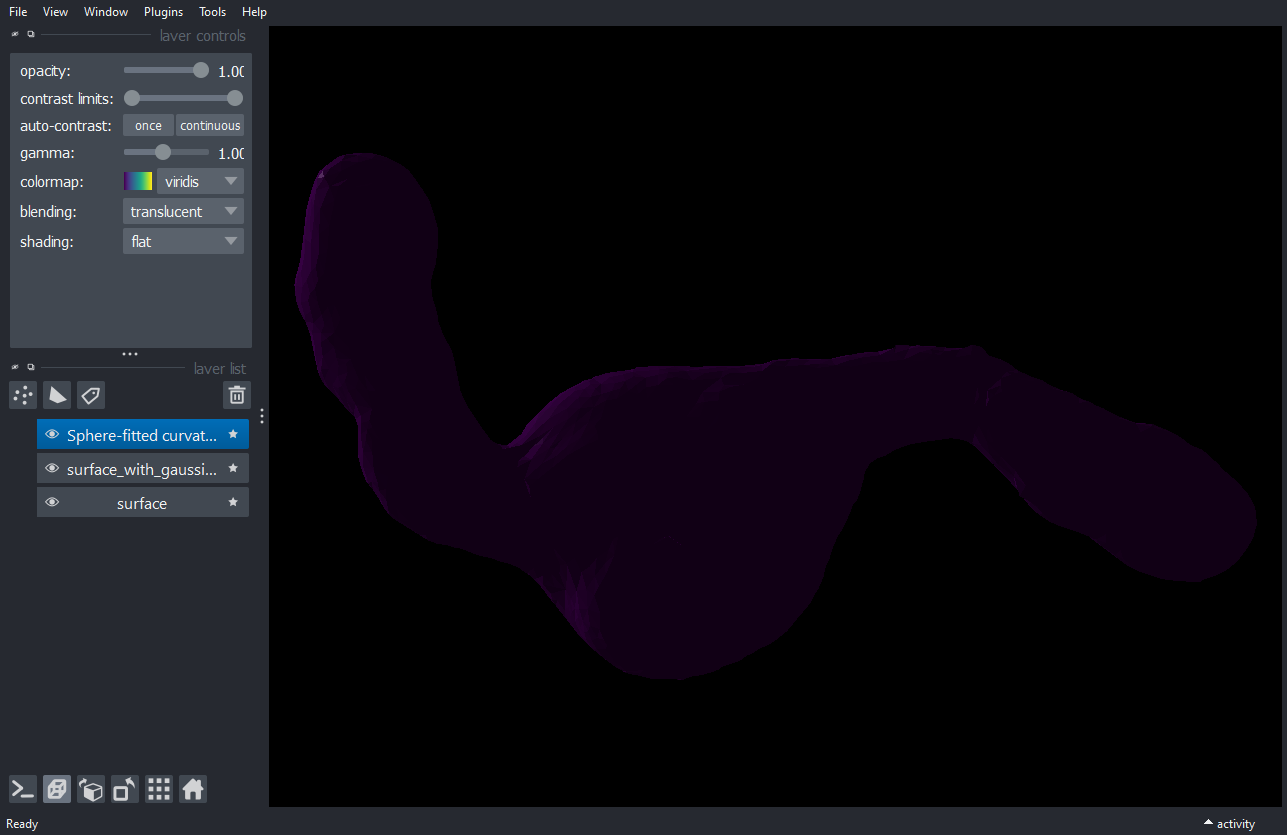

In [7]:
surface_with_sf_curvature_deci_voxel = nppas.add_quality(surface, nppas.Quality.SPHERE_FITTED_CURVATURE_DECI_VOXEL)
viewer.add_surface(surface_with_sf_curvature_deci_voxel, name='Sphere-fitted curvature (deci voxel)', colormap='viridis')

napari.utils.nbscreenshot(viewer)

c:\structure\code\vedo\vedo\pointcloud.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C, residue, rank, _ = np.linalg.lstsq(A, f)  # solve AC=f


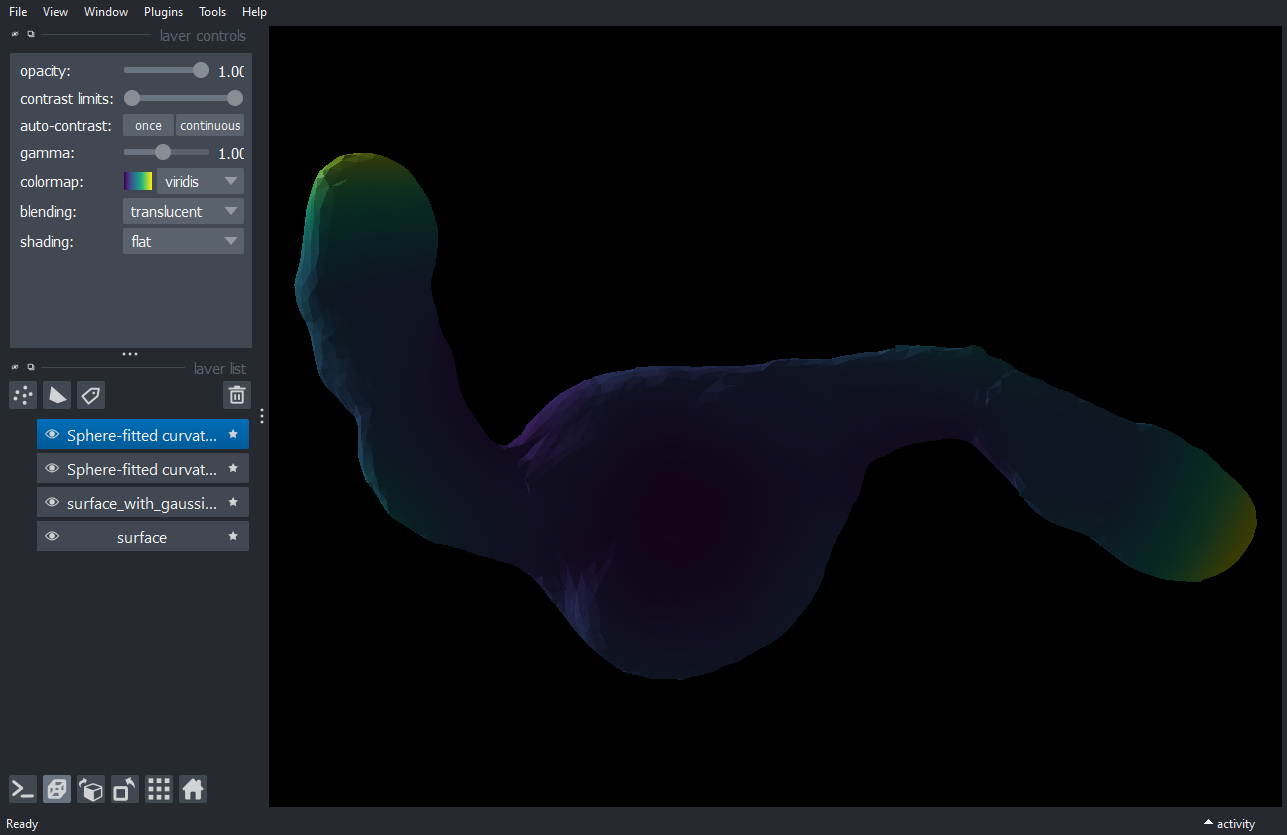

In [8]:
surface_with_sf_curvature_hecta_voxel = nppas.add_quality(surface, nppas.Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL)
viewer.add_surface(surface_with_sf_curvature_hecta_voxel, name='Sphere-fitted curvature (hecta voxel)', colormap='viridis')

napari.utils.nbscreenshot(viewer)